In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()
# Datareader is required for acquiring data from online.
from pandas_datareader import data, wb
import datetime as dt

In [2]:
# Acquiring the stock data for Bank of America, CitiGroup, Goldman Sachs, JPMorgan Chase, Morgan Stanley, and Wells Fargo from 1/1/2006 to 1/1/2016.
start = dt.datetime(2006,1,1)
end = dt.datetime(2016,1,1)

# Read each data separately and then concatenate; or read as a panel object (see below):
# Bank of America (BAC):
# BAC = data.DataReader('BAC','stooq',start,end)
# CitiGroup (C):
# C = data.DataReader('C','stooq',start,end)
# Goldman Sachs (GS):
# GS = data.DataReader('GS','stooq',start,end)
# JPMorgan Chase (JPM):
# JPM = data.DataReader('JPM','stooq',start,end)
# Morgan Stanley (MS):
# MS = data.DataReader('MS','stooq',start,end)
# Wells Fargo (WFC):
# WFC = data.DataReader('WFC','stooq',start,end)

# tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
# Concatenate the data frames together.
# df = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
# Setting the column level names:
# df.columns.names = ['Stock Info','Bank Ticker']

# Read all data at once:
df = data.DataReader(['BAC','C','GS','JPM','MS','WFC'],'stooq',start,end)
# Setting the column level names differebt from default values.
df.columns.names = ['Stock Info','Bank Ticker']
# Re-sort the data to change index levels of the columns for future analysis.
df = df.swaplevel(i='Stock Info',j='Bank Ticker',axis=1).sort_index(level=0, axis=1)
df.head()

Bank Ticker      BAC                                                 C  \
Stock Info     Close     High      Low     Open        Volume    Close   
Date                                                                     
2006-01-03   39.6217  39.7023  38.8390  39.4871  1.936396e+07  407.891   
2006-01-04   39.2004  39.7592  39.0904  39.5549  2.110031e+07  400.354   
2006-01-05   39.2525  39.4126  38.9834  39.2004  1.761312e+07  402.321   
2006-01-06   39.1917  39.4774  39.0089  39.3850  1.496529e+07  402.321   
2006-01-09   39.2181  39.5294  39.0158  39.3182  1.855918e+07  400.432   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low     Open        Volume  ...    Close     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  405.492  1.858097e+06  ...  38.2361  38.3558   
2006-01-04   406.325  400.089  404.358  2.260921e+06  ...  38.2675  38.8778   
2006-01-05   403.663  400.520  400.843  1.371893e+06  ...  38.3715  38.4264   
2006-01-06   404.641  398.865  404.504  1.655812e+06  ...  38.4108  38.5922   
2006-01-09   403.329  399.678  402.174  2.031072e+06  ...  38.8120  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low     Open        Volume    Close     High      Low   
Date                                                                     
2006-01-03   37.2060  37.4934  6.806387e+06  22.9581  23.0144  22.4559   
2006-01-04   38.2675  38.4971  1.009857e+07  22.6917  22.8979  22.5683   
2006-01-05   38.0448  38.2675  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.5432  8.721337e+06  22.7983  22.8643  22.5920   
2006-01-09   38.4412  38.4470  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info      Open        Volume  
Date                                
2006-01-03   22.7430  1.530724e+07  
2006-01-04   22.8831  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7302  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

In [3]:
# Finding the max closing values for each of the banks across the time period (2006-2016).
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

In [4]:
# Preparing a data frame for the return values of the tickers.
stReturns = pd.DataFrame()

In [5]:
# Use "pct_change()" to calculate the return of each bank's stock across the time period (2006-2016).
# First row will be NA as there's no previous day's data.
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
for tick in tickers:
    stReturns[tick+' Return'] = df[tick]['Close'].pct_change(fill_method=None)

In [6]:
stReturns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004101,0.001453,-0.002507,-0.001915,-0.003609,-0.004024
2015-12-28,-0.008110,-0.006245,-0.004702,-0.003286,-0.009601,-0.002472
2015-12-29,0.008633,0.011509,0.010432,0.010303,0.011815,0.011086


E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

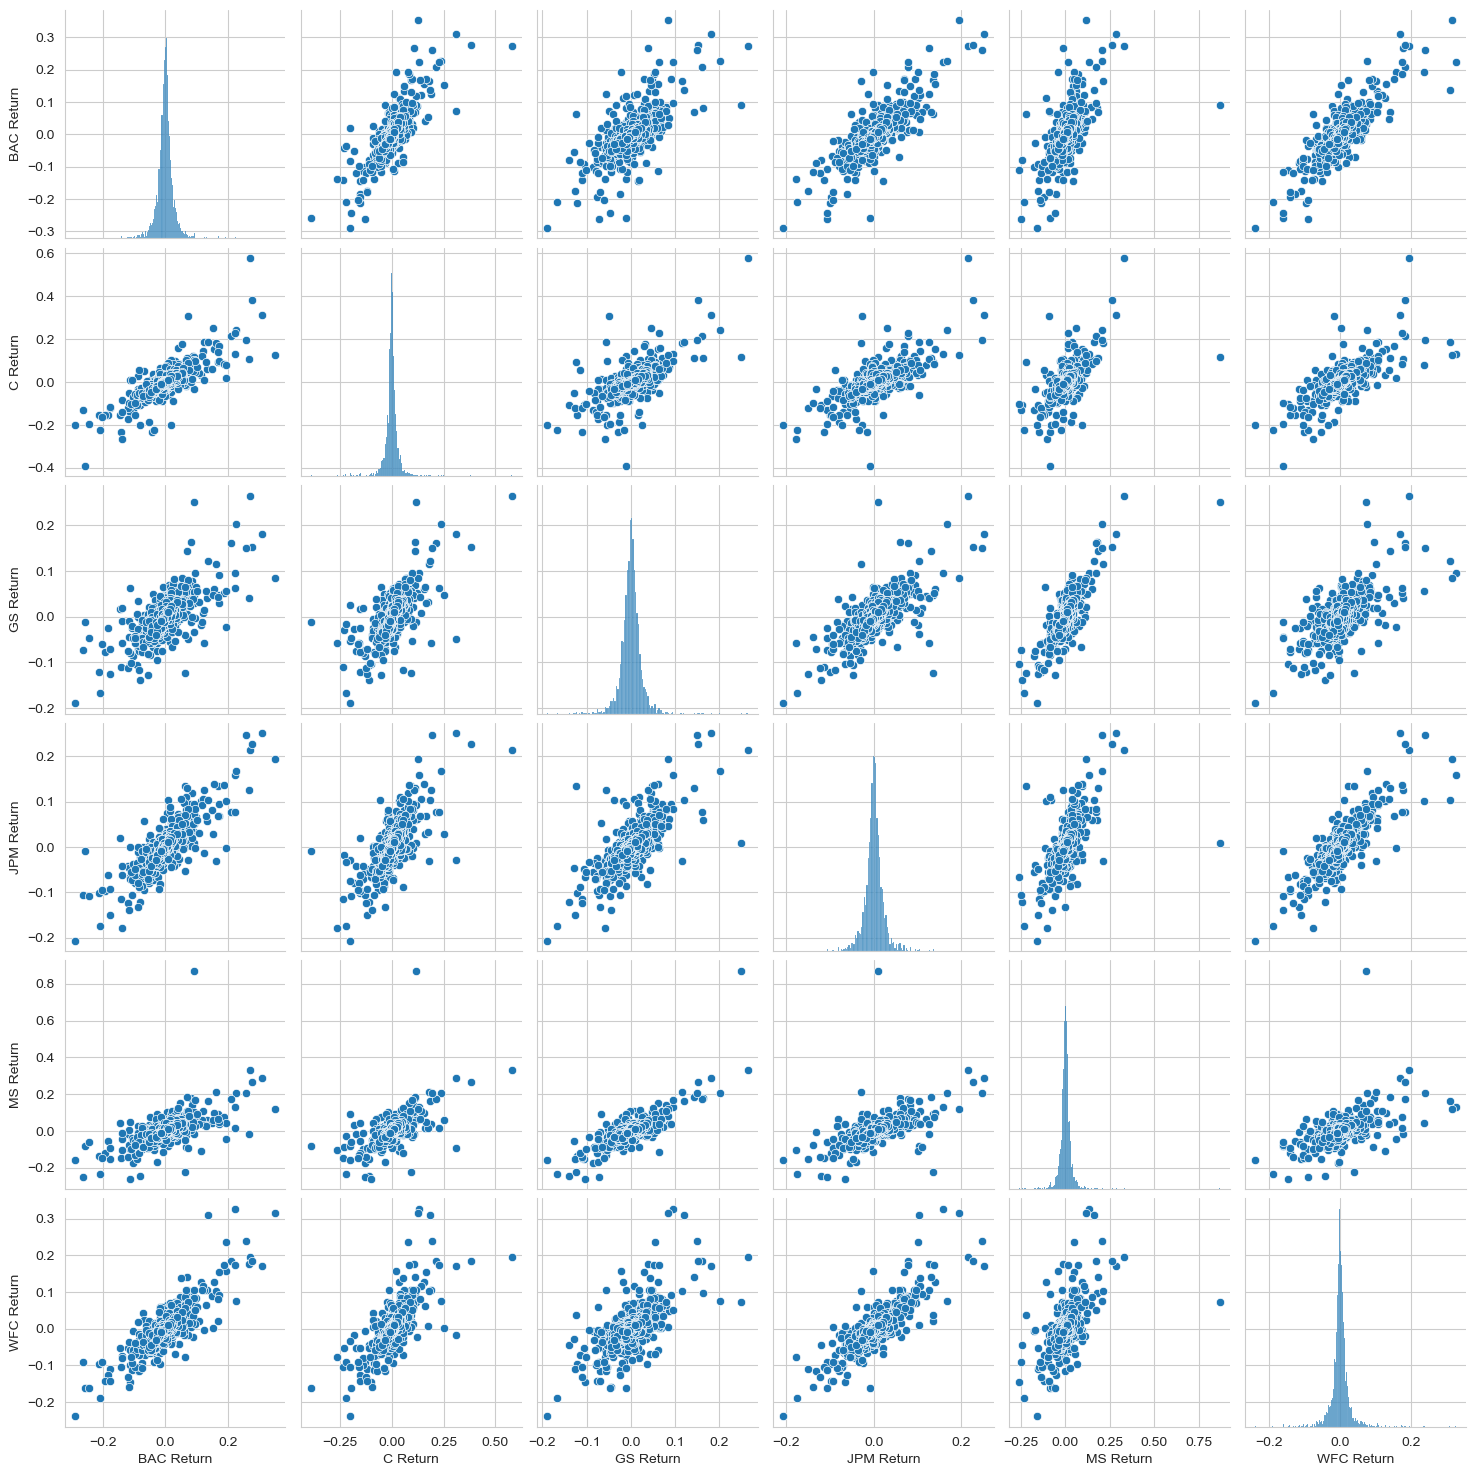

In [7]:
sns.pairplot(stReturns)

In [8]:
# Finding the historically lowest returns for each ticker.
stReturns.min()

BAC Return   -0.289669
C Return     -0.390279
GS Return    -0.189581
JPM Return   -0.207415
MS Return    -0.258721
WFC Return   -0.238398
dtype: float64

In [9]:
# Finding the time periods (indices) when the returns were lowest for each ticker.
stReturns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [10]:
# Finding the historically highest returns for each ticker.
stReturns.max()

BAC Return    0.352689
C Return      0.578367
GS Return     0.264656
JPM Return    0.251152
MS Return     0.870166
WFC Return    0.327415
dtype: float64

In [11]:
# Finding the time periods (indices) when the returns were highest for each ticker.
stReturns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [12]:
# Checking the standard deviation to see the stability of the stock prices:
stReturns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037723
WFC Return    0.030221
dtype: float64

In [13]:
# Checking the standard deviation of only the year 2015 to see the stability of the stock prices:
stReturns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016149
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016006
WFC Return    0.012545
dtype: float64

E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



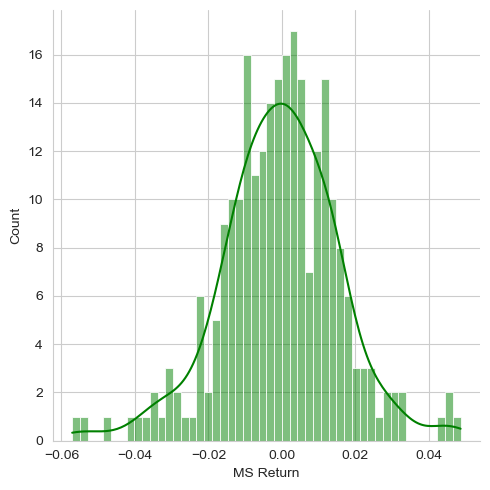

In [14]:
# Distribution plot for 2015 Morgan Stanley returns: not very significant difference (streches out to 0.06)
sns.displot(stReturns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=50,kde=True)

E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



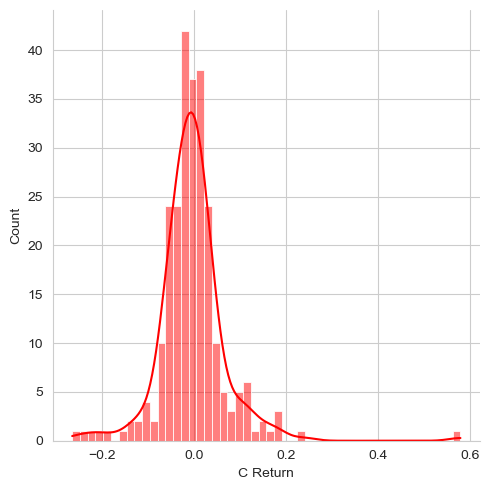

In [15]:
# Distribution plot for 2008 CitiGroup returns: significant difference (streches out to 0.6)
sns.displot(stReturns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=50,kde=True)

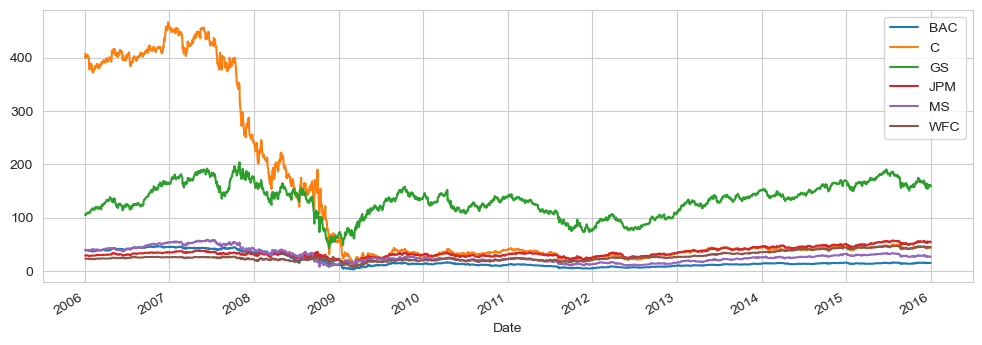

In [16]:
# Can easily observe the massive drop in CitiGroup's closing price compared to the others.
for tick in tickers:
    df[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<Axes: xlabel='Date'>

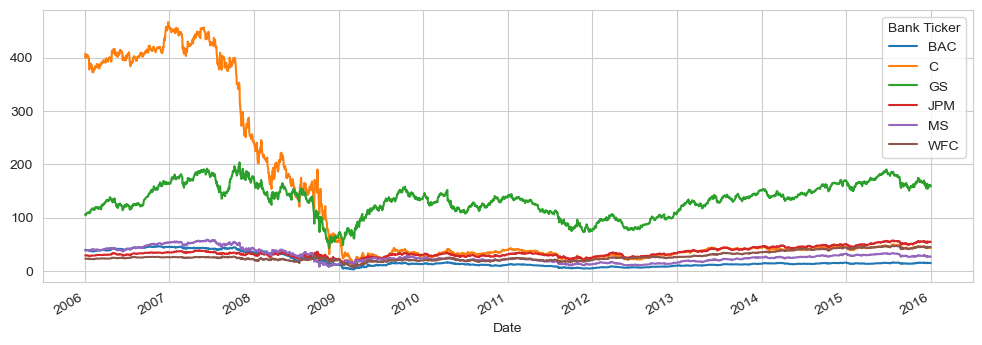

In [17]:
# Using cross-section to plot the same data, instead of a for-loop.
df.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\cufflinks\plotlytools.py:118: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



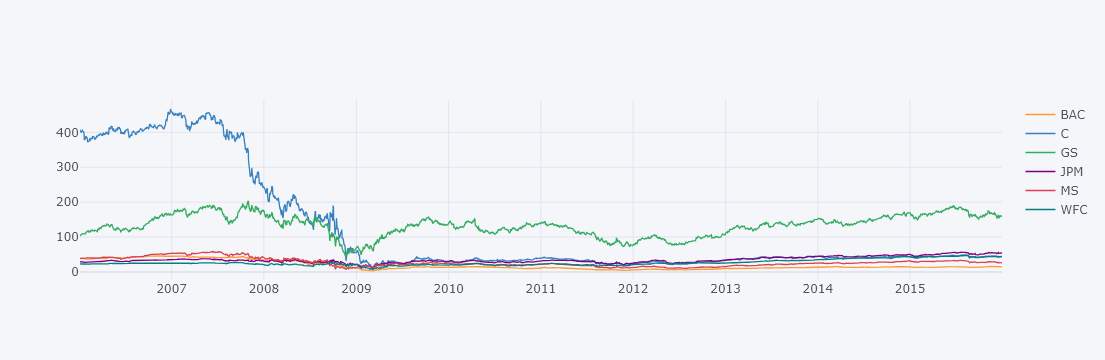

In [18]:
# Using cross-section and plotly to plot the same data for interactivity.
df.xs(key='Close',axis=1,level='Stock Info').iplot()

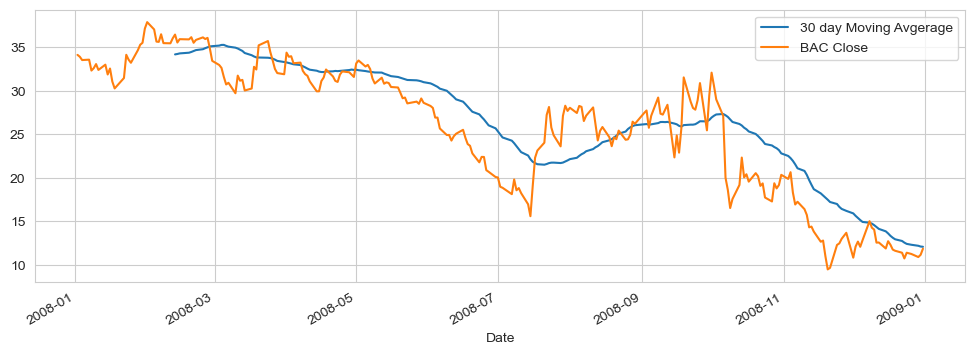

In [19]:
# Finding 30-day moving average for Bank of America's stock for 2008:
plt.figure(figsize=(12,4))
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Moving Avgerage')
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

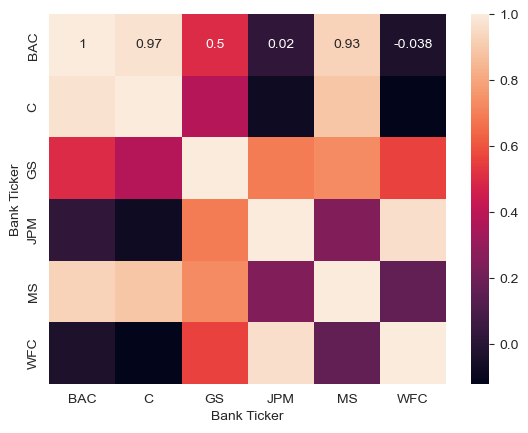

In [20]:
# Heatmap of the correlation between ticker's stocks closing price.
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

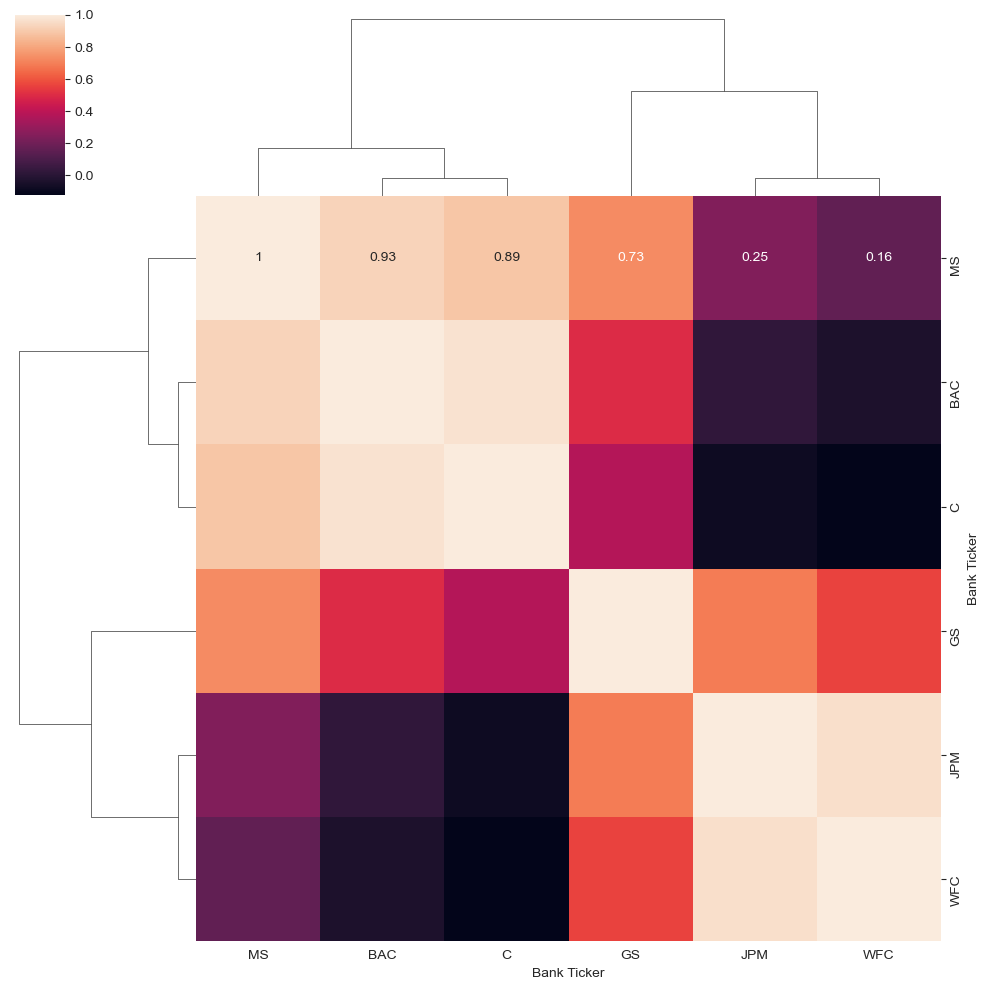

In [21]:
# Clustermap of the correlation between ticker's stocks closing price.
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Bank Ticker                                                            
BAC          1.000000  0.970862  0.499725  0.019835  0.927576 -0.038152
C            0.970862  1.000000  0.376065 -0.081897  0.888668 -0.121581
GS           0.499725  0.376065  1.000000  0.691696  0.729949  0.557882
JPM          0.019835 -0.081897  0.691696  1.000000  0.245861  0.961907
MS           0.927576  0.888668  0.729949  0.245861  1.000000  0.159574
WFC         -0.038152 -0.121581  0.557882  0.961907  0.159574  1.000000


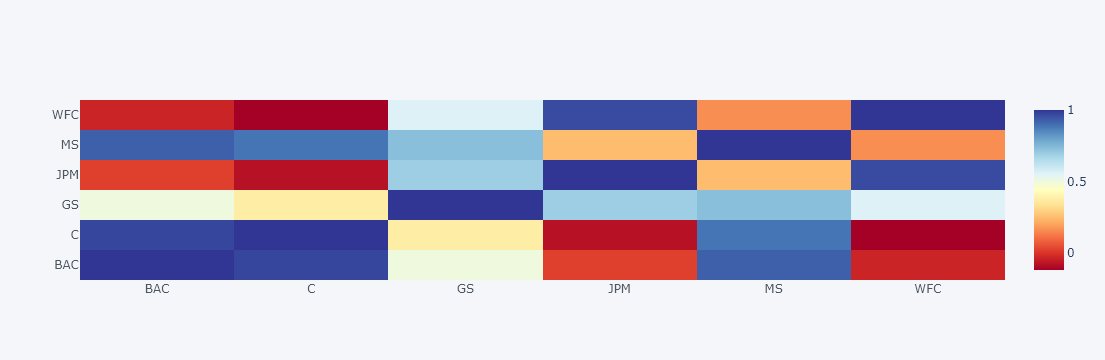

In [25]:
# Heatmap of the correlation between ticker's stocks closing price utilizing plotly for interactivity.
close_corr = df.xs(key='Close',axis=1,level='Stock Info').corr()
print(close_corr)
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

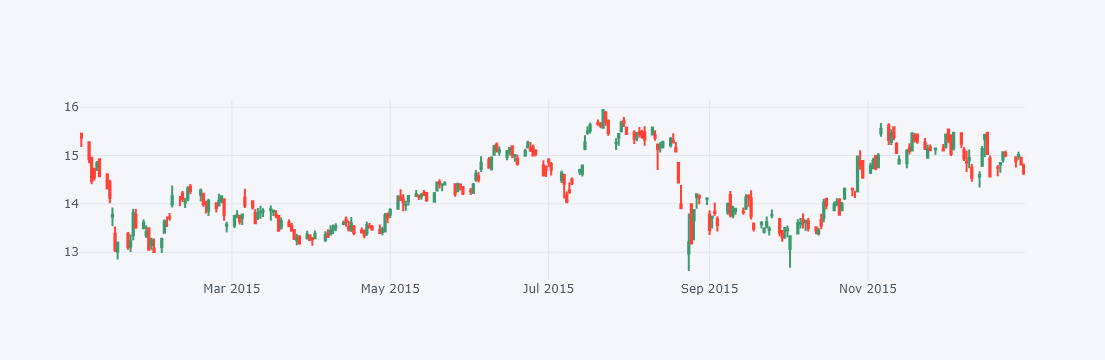

In [49]:
# Candle plot of Bank of America's 2015 stock prices to indentify the stock price changes (up/down):
bac2015 = df['BAC'][['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac2015.iplot(kind='candle')

E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\cufflinks\plotlytools.py:118: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



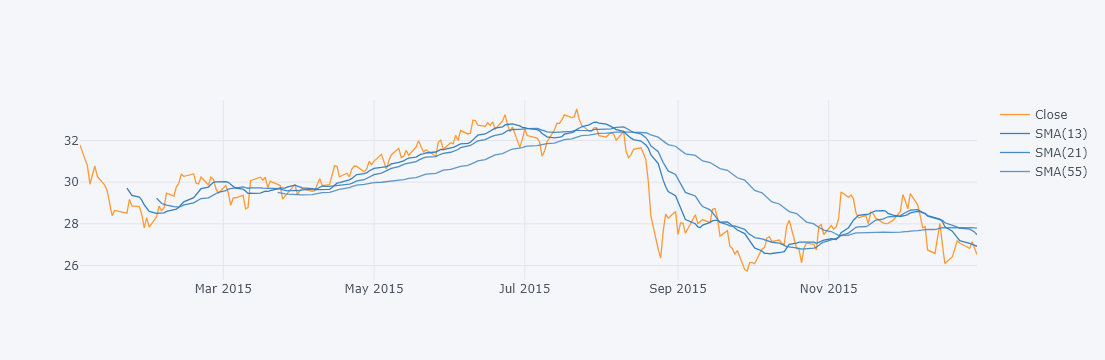

In [89]:
# Simple moving average plot of Morgan Stanley's 2015 stock prices:
ms2015 = df['MS']['Close'].loc['2015-01-01':'2016-01-01']
# ms2015.index = ms2015.index.astype(str)
ms2015.ta_plot(study='sma',periods=[13,21,55])

E:\Kurow - SSD S\Documents\env\pierian\Lib\site-packages\cufflinks\plotlytools.py:118: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



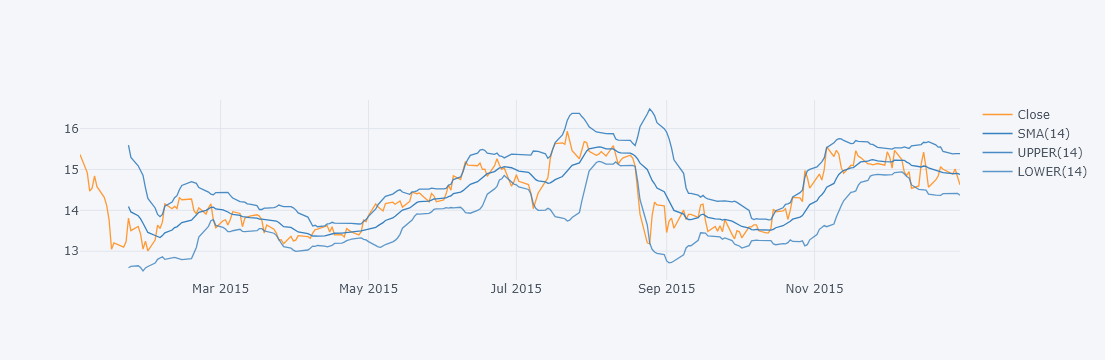

In [87]:
# Bollinger Band plot of Bank of America's 2015 stock prices:
bac2015 = df['BAC']['Close'].loc['2015-01-01':'2016-01-01']
bac2015.ta_plot(study='boll')